In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Sampler
from AdaIN import AdaIN

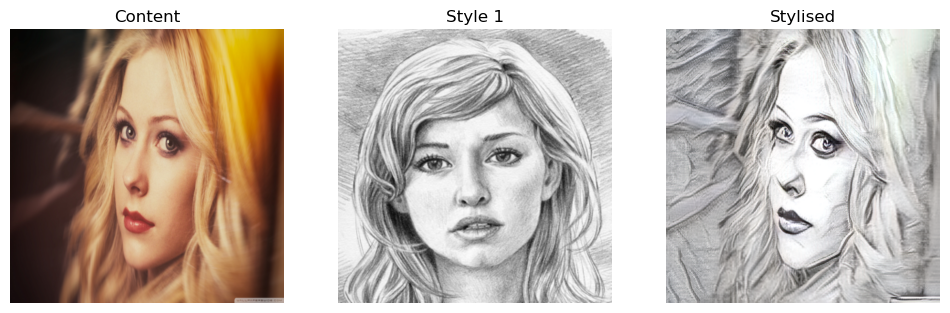

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.708, '211.230 ms')

In [2]:
style_path = "style/sketch.png"
prebuildEncoder = "Model/vgg.pth"
image_path = "content/avril.jpg"
prebuildDecoder = "Model/decoder-adain.pth"

#Provided decoder run
adainModel = AdaIN(prebuildEncoder, prebuildDecoder)
adainModel.setup()
adainModel.fit(image_path, [style_path])
adainModel.pipeline()
adainModel.displayImages()
adainModel.evaluate()

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(256),
    transforms.ToTensor()
])

#coco content
train_content_dataset = datasets.ImageFolder(
    root= "../coco",             
    transform=transform
)

#wikiart
train_style_dataset = datasets.ImageFolder(
    root= "../archive",             
    transform=transform
)

train_content_loader = DataLoader(train_content_dataset, batch_size=1, shuffle=True)
train_style_loader = DataLoader(train_style_dataset, batch_size=1, shuffle=True)

#Training Completed
# defaultModel = AdaIN(prebuildEncoder)
# defaultModel.loadPrebuildEncoder(31)
# defaultModel.epochTraining(train_content_loader, train_style_loader, "default.pth", steps = 20000, epoch = 5)
# defaultModel.fit(image_path,[style_path])
# defaultModel.pipeline()
# defaultModel.displayImages()
# defaultModel.evaluate()

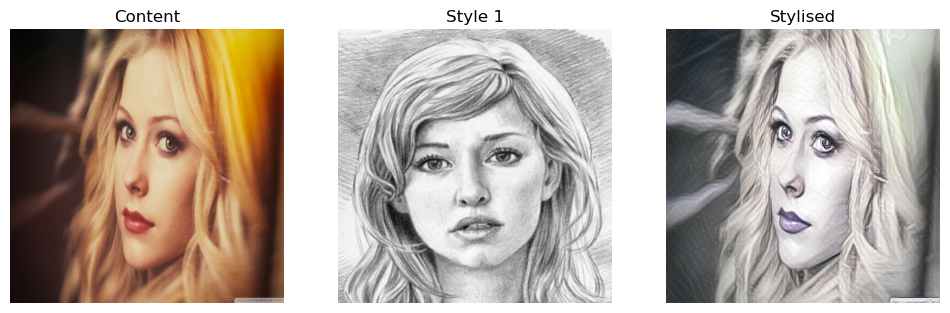

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.549, '122.815 ms')

In [4]:
#Load trained decoder image
defaultModel = AdaIN(prebuildEncoder,"Model/default.pth_5.pth")
defaultModel.fit(image_path,[style_path])
defaultModel.setup()
defaultModel.pipeline()
defaultModel.displayImages()
defaultModel.evaluate()

In [5]:
# Training Completed
# strongStyleModel = AdaIN(prebuildEncoder)
# strongStyleModel.loadPrebuildEncoder(31)
# strongStyleModel.epochTraining(train_content_loader, train_style_loader, "default-style-strong.pth", steps = 20000, epoch = 15, style_weight = 10.0)
# strongStyleModel.fit(image_path,[style_path])
# strongStyleModel.pipeline()
# strongStyleModel.displayImages()
# strongStyleModel.evaluate()

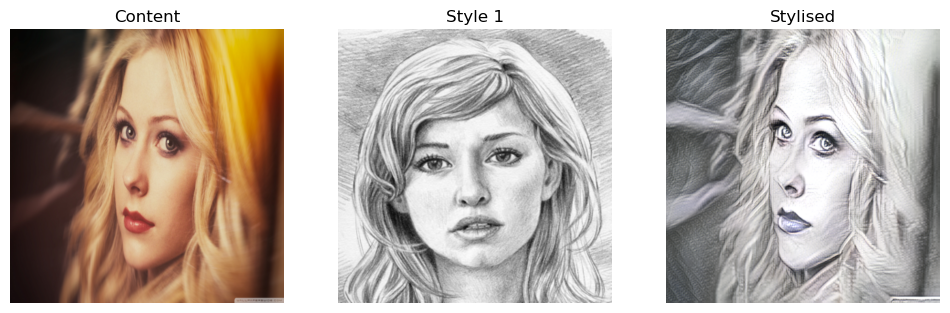

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.664, '272.521 ms')

In [6]:
#Trained with 1:10 content to style ratio
strongStyleModel = AdaIN(prebuildEncoder,"Model/default-style-strong.pth_15.pth")
strongStyleModel.fit(image_path,[style_path])
strongStyleModel.setup()
strongStyleModel.pipeline()
strongStyleModel.displayImages()
strongStyleModel.evaluate()